In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Contexto - **Startups**
El dataset de startups contiene variables como gastos en
investigación y desarrollo (I+D), costos administrativos, gastos en
marketing, ubicación geográfica y beneficios netos.
Este tipo de datos es esencial para entender el rendimiento
financiero y operativo de una startup, lo cual es crítico para la
toma de decisiones tanto para los inversionistas como para la
administración de la empresa.

## Consignas:
    a. Análisis Exploratorio de Datos (EDA) ¿Qué conclusiones
    puede sacar con respecto a las distribuciones de las
    variables numéricas y las relaciones entre ellas?
    b. Modelo de Regresión Lineal para Predecir Beneficio Neto.
    c. Cual es la intuicion detrás de la formula de la regresion
    resultante.
    d. Cual es el error promedio? y el error elevado al cuadrado?
    ¿Que significa?
    e. Analice del Sector de la Industria en el Beneficio Neto.
    f. Cual es la relacion entre las series y el profit? Es importante
    hay alguna particularidad? (Hint)

In [2]:
startups = pd.read_csv('Datasets/emprendimientos.csv')
copia_startups = startups.copy()

## **Análisis exploratorio de los datos**

In [3]:
startups.columns

Index(['Unnamed: 0', 'RnD_Expenditure', 'Admin_Costs', 'Marketing_Expenditure',
       'Location', 'Net_Profit', 'Industry_Sector', 'Profit', 'Employee_Count',
       'Investment_Round', 'Operational_Cost'],
      dtype='object')

In [4]:
print(f'El dataframe contiene información sobre industria, ubicación, cantidad de empleados, rondas de inversión, profits, costos y gastos de {startups.shape[0]} startups.')

El dataframe contiene información sobre industria, ubicación, cantidad de empleados, rondas de inversión, profits, costos y gastos de 70 startups.


In [5]:
startups.head()

,Unnamed: 0,RnD_Expenditure,Admin_Costs,Marketing_Expenditure,Location,Net_Profit,Industry_Sector,Profit,Employee_Count,Investment_Round,Operational_Cost
0,0,165349.20,136897.80,471784.10,New York,192261.83,Energy,227095.722346,289,Series A,608681.90
1,1,162597.70,151377.59,443898.53,California,191792.06,Tech,224711.757208,217,Series B,595276.12
2,2,153441.51,101145.55,407934.54,Florida,191050.39,Finance,222717.429984,407,Series C,509080.09
3,3,144372.41,118671.85,383199.62,New York,182901.99,Finance,214017.365199,383,Series A,501871.47
4,4,142107.34,91391.77,366168.42,Florida,166187.94,Finance,196476.965990,351,Series B,457560.19


In [6]:
startups.tail()

,Unnamed: 0,RnD_Expenditure,Admin_Costs,Marketing_Expenditure,Location,Net_Profit,Industry_Sector,Profit,Employee_Count,Investment_Round,Operational_Cost
65,65,134093.502036,47327.344651,26681.272559,California,105423.930052,Tech,120378.804381,335,Seed,74008.617209
66,66,83460.960473,102975.139152,287058.802746,New York,-21313.506762,Healthcare,-14885.847169,430,Seed,390033.941898
67,67,111737.965689,125193.850785,73364.287453,New York,187372.314677,Finance,197551.192890,367,Seed,198558.138238
68,68,28077.387719,2743.241602,294652.768452,New York,62478.033370,Healthcare,64877.719983,258,Seed,297396.010053
69,69,39620.297817,112521.647242,349879.180010,Florida,94597.403597,Healthcare,98661.735576,31,Seed,462400.827252


In [7]:
startups.columns = startups.columns.str.lower()

In [8]:
startups.dtypes

unnamed: 0                 int64
rnd_expenditure          float64
admin_costs              float64
marketing_expenditure    float64
location                  object
net_profit               float64
industry_sector           object
profit                   float64
employee_count             int64
investment_round          object
operational_cost         float64
dtype: object

In [9]:
startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   unnamed: 0             70 non-null     int64  
 1   rnd_expenditure        70 non-null     float64
 2   admin_costs            70 non-null     float64
 3   marketing_expenditure  70 non-null     float64
 4   location               70 non-null     object 
 5   net_profit             70 non-null     float64
 6   industry_sector        70 non-null     object 
 7   profit                 70 non-null     float64
 8   employee_count         70 non-null     int64  
 9   investment_round       70 non-null     object 
 10  operational_cost       70 non-null     float64
dtypes: float64(6), int64(2), object(3)
memory usage: 6.1+ KB


In [10]:
startups.isna().sum()

unnamed: 0               0
rnd_expenditure          0
admin_costs              0
marketing_expenditure    0
location                 0
net_profit               0
industry_sector          0
profit                   0
employee_count           0
investment_round         0
operational_cost         0
dtype: int64

El dataset no contiene valores faltantes.

### **Validación de datos**

In [11]:
for col in startups.columns:
    if startups[col].dtype == 'object':
        print('--------------------------')
        print(startups[col].nunique(),'valores:', startups[col].unique())
        
        print(startups[col].value_counts(ascending=False))

--------------------------
3 valores: ['New York' 'California' 'Florida']
location
New York      25
California    25
Florida       20
Name: count, dtype: int64
--------------------------
5 valores: ['Energy' 'Tech' 'Finance' 'Healthcare' 'Retail']
industry_sector
Tech          18
Healthcare    17
Finance       13
Energy        11
Retail        11
Name: count, dtype: int64
--------------------------
5 valores: ['Series A' 'Series B' 'Series C' 'IPO' 'Seed']
investment_round
Seed        37
Series C    13
Series B     9
IPO          6
Series A     5
Name: count, dtype: int64


### **Rondas de inversión**, ¿qué significa cada una? Las definiciones nos serán útiles para detectar outliers.
 - semilla: son las primeras rondas de financiamiento de una compañía y preceden a la Serie A. 
    
        Se utiliza para llevar a una startup de idea hacia la tracción inicial, como el desarrollo de MVP, contratar a los primeros miembros del equipo, y realizar experimentos de mercado. 
    
        En términos de inversión, en Rondas Semilla las startups levantan en promedio, USD $5 a USD $6 millones, en Estados Unidos.

 - serie a: 
        es considerada la primera ronda de inversión de venture capital (VC) de una startup, pues la financiación proviene principalmente de las firmas de venture capital.   
        
        Usualmente, una startup levanta una Serie A después de una ronda semilla (seed round). 
        
        En términos de inversión, las Series A recaudan en promedio, USD $15 millones, en Estados Unidos.

 - serie b: 
        considerada la segunda ronda de inversión de venture capital (VC) de una startup, pues la financiación proviene principalmente de las firmas de venture capital. 
        
        Usualmente, una startup levanta una Serie B después de una serie A. 
        
        En términos generales, una ronda Serie B financia una estrategia de crecimiento más agresiva y que la startup se enfoque más en la rentabilidad.
        
        En términos de inversión, en una Serie B se levanta en promedio, USD $20 a $80 millones.

 - serie c: 
        el objetivo es obtener más plata para el desarrollo de nuevos productos, adquisiciones o incluso, para empezar a preparar lo que podría ser la salida a cotización en la Bolsa. 
        
        Las cifras de esta ronda de inversión son generalmente de 50 millones de dólares en adelante.
        
 - ipo: incorporación de una empresa al mercado de valores al emitir sus primeras acciones para atraer capital público.


In [12]:
startups.describe().round(1)

,unnamed: 0,rnd_expenditure,admin_costs,marketing_expenditure,net_profit,profit,employee_count,operational_cost
count,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0
mean,34.5,73645.8,110300.3,212933.0,108074.6,120746.5,264.5,323233.3
std,20.4,46643.7,39611.4,129284.2,49144.6,55478.9,141.1,135322.6
min,0.0,0.0,2743.2,0.0,-21313.5,-14885.8,10.0,24435.5
25%,17.2,37578.7,96962.6,120540.4,78931.4,83428.6,144.8,219525.1
50%,34.5,73051.1,118609.0,212716.2,106661.2,119810.7,262.0,322937.7
75%,51.8,106300.8,136547.1,302423.8,140623.0,160098.3,393.0,413510.7
max,69.0,175623.5,182645.6,494430.5,192261.8,227095.7,497.0,614542.2


### Inconsistencias de presentación de resultados. 
Resultados netos mayores a resultados brutos. ¿Hay empresas que presentaron de esta manera? Si, los hay, se quitan.

In [13]:
inconsistencia_economica = startups['net_profit'] > startups['profit']
startups_con_utilidades_inconsistentes = startups[inconsistencia_economica]
startups_con_utilidades_inconsistentes

,unnamed: 0,rnd_expenditure,admin_costs,marketing_expenditure,location,net_profit,industry_sector,profit,employee_count,investment_round,operational_cost
45,45,1000.230000,124153.040000,1903.930000,New York,64926.080000,Energy,64688.051698,461,Seed,126056.970000
46,46,1315.460000,115816.210000,297114.460000,Florida,49490.750000,Tech,48501.046640,92,Seed,412930.670000
48,48,542.050000,51743.150000,0.000000,New York,35673.410000,Healthcare,34167.922152,237,Series A,51743.150000
49,49,0.000000,116983.800000,45173.060000,California,14681.400000,Energy,14468.659720,158,Seed,162156.860000
52,52,22.874963,47013.626724,140221.996032,California,181877.145099,Tech,180909.147951,222,Seed,187235.622756


Eliminamos las startups con las inconsistencias mencionadas.

In [14]:
startups = startups[~inconsistencia_economica]

In [15]:
startups.drop(columns='unnamed: 0', inplace=True)
startups.columns

Index(['rnd_expenditure', 'admin_costs', 'marketing_expenditure', 'location',
       'net_profit', 'industry_sector', 'profit', 'employee_count',
       'investment_round', 'operational_cost'],
      dtype='object')

## **Outliers** 

<Axes: >

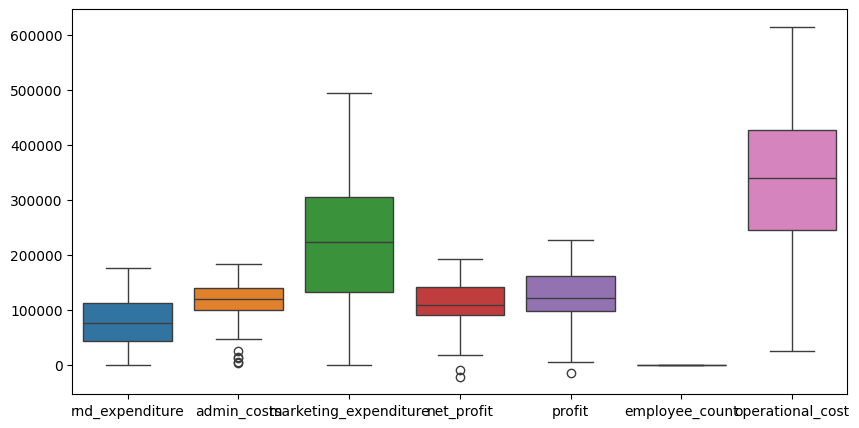

In [16]:
plt.figure(figsize=(10,5))
sns.boxplot(data=startups)

Podemos observar la presencia de outliers por encima del primer cuartil y el tercer cuartil del box plot en admin_costs, net_profit y profit.

Para encontrar y filtrar dichos outliers del df, crearemos una función que nos ayuda a removerlos. 
 - Encontrar el valor intercuartil que puede ser calculado con la diferencia entre los valores del tercer y primer cuartil. 
 - Seleccionamos las startups que quedan fuera del rango y las removemos.

In [17]:
startups.columns

Index(['rnd_expenditure', 'admin_costs', 'marketing_expenditure', 'location',
       'net_profit', 'industry_sector', 'profit', 'employee_count',
       'investment_round', 'operational_cost'],
      dtype='object')

In [18]:
def sin_outliers(datos):
    q1 = np.quantile(datos, 0.25)
    q3 = np.quantile(datos, 0.75)
    iqr = q3 - q1
    rango_bajo = q1 - 1.5 * iqr
    rango_alto = q3 + 1.5 * iqr
    return (datos > rango_bajo) & (datos < rango_alto)

<Axes: >

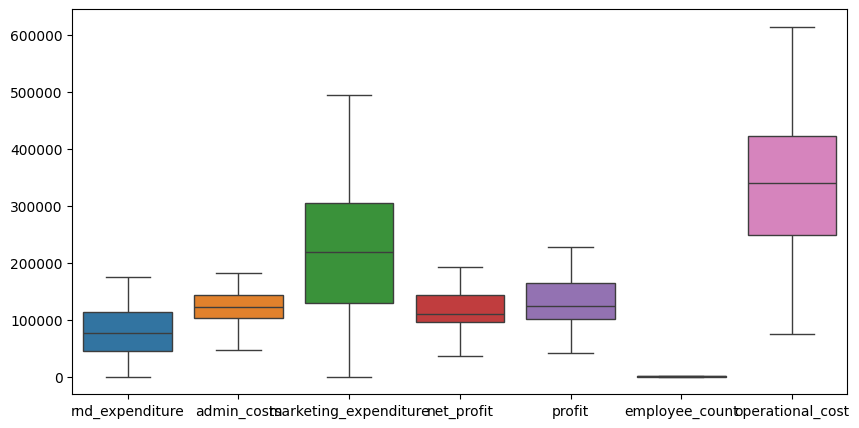

In [19]:
startups = startups[sin_outliers(startups['admin_costs'])]
startups = startups[sin_outliers(startups['net_profit'])]
startups = startups[sin_outliers(startups['profit'])]
plt.figure(figsize=(10,5))
sns.boxplot(data=startups)

### Conclusiones de las variables númericas


### **Correlaciones**

<Axes: >

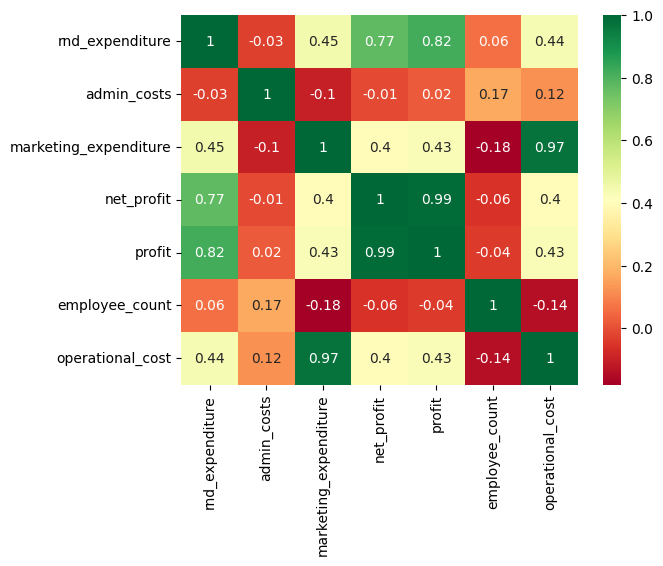

In [20]:
sns.heatmap(data=round(startups.corr(numeric_only=True),2), annot=True, cmap='RdYlGn')

 - research_and_delevopement_expenditure: fuerte correlación con los beneficios de las startups. aquellas que alocan capital en la investigacion y desarrollo del negocio suelen conseguir mayores beneficios y viceversa.
 - admin_costs: se relaciona positivamente pero a la vez débil con la cantidad de empleados que una startup contiene. En otras palabras, el número de empleados no explica la variación en los gastos de administración de manera significativa, o viceversa.
 - marketing_expenditure: a medida que aumenta el gasto en marketing, la cantidad de empleados baja (-0.18), ya que se correlacionan negativamente. Cuasi perfecta relación entre gastos de marketing y costos operativos. 

## **Modelo de regresión lineal para predecir el beneficio neto**

1. Importamos la biblioteca statsmodels

In [21]:
import statsmodels.formula.api as smf

2. Seleccionamos e instanciamos features del modelo (X)

In [22]:
features_ben_neto = ['admin_costs', 'operational_cost', 'rnd_expenditure', 'employee_count', 'marketing_expenditure']

3. Instanciamos variable independiente (Y), beneficio neto

In [23]:
y = 'net_profit'

4. Instanciamos el modelo de regresión lineal y lo entrenamos para encontrar la mejor línea

In [24]:
formula = y + ' ~ ' + ' + '.join(features_ben_neto)
formula

'net_profit ~ admin_costs + operational_cost + rnd_expenditure + employee_count + marketing_expenditure'

In [25]:
model = smf.ols(formula=formula, data=startups).fit()

5. Imprimimos resumen del modelo

In [26]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             net_profit   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     19.93
Date:                Wed, 08 Nov 2023   Prob (F-statistic):           4.62e-10
Time:                        22:03:37   Log-Likelihood:                -670.16
No. Observations:                  58   AIC:                             1350.
Df Residuals:                      53   BIC:                             1361.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              6.111e+04   1.82e+04      3.364      0.001    2.47e+04    9.75e+04
admin_costs               0.0262      0.084      0.312      0.756      -0.142       0.194
operational_cost          0.0204      0.044      0.464      0.644      -0.068       0.109
rnd_expenditure           0.6815      0.089      7.643      0.000       0.503       0.860
employee_count          -29.1118     25.546     -1.140      0.260     -80.350      22.126
marketing_expenditure    -0.0057      0.046     -0.125      0.901      -0.098       0.086
==============================================================================
Omnibus:                       20.284   Durbin-Watson:                   2.215
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.009
Skew:                          -0.970   Prob(JB):                     6.20e-11
Kurtosis:                       6.961   Cond. No.                     1.37e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.5e-20. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## **Intuición detrás del modelo de regresión lineal resultante**

 - El R^2 de 0.601 indica que el modelo explica un 60,1% de la varianza del beneficio neto. Es decir, un 60,1% de la variación en el beneficio neto generado por las startups, se explica por las variaciones de los costos de administración, los costos operativos, los gastos en I&D, la cantidad de empleados y los gastos en marketing. El resto de la varianza puede atribuirse al azar o a otras variables que no hemos incorporado al modelo.

 - Se testeó la significancia general del modelo con el F-statistic. La h0 dice que los betas son todos ceros, la h1, al menos un beta es distinto a cero. Si todos los betas son cero, entonces ninguna de las variables dependientes importa, entonces el modelo no tiene mérito. F statistic de 19.93, el p-value es aproximadamente 0,000. El modelo es significamente estadístico. Al menos una de los features se relaciona con la variable dependiente.

 - Si todas las features seleccionadas tuvieran valor igual a cero, el beneficio neto de la empresa sería de $61.110, 00.
 
 

 Dejando las demás variables igual a cero: 
 - Por cada dólar adicional en costos de administración, el beneficio neto aumenta 0,0262 dólares.
 - Por cada dólar adicional en costos operativos, el beneficio neto aumenta 0,0204 dólares.
 - Por cada dólar adicional en gastos de I&D, el beneficio neto aumenta 0,6815 dólares.
 - Por cada empleado contratado adicional, el beneficio neto disminuye 29 dólares.
 - Por cada dólar adicional en gastos de marketing, el beneficio net disminuye 0,0057 dólares.

Observemos las significaciones estadísticas de cada feature:
- En admin_costs, operational_cost, employee_count y marketing_expenditure, el cero está incluido, por ende, no son estadísticamente significativas en la predicción del net_profit.
- Únicamente en rnd_expenditure, se considera estadísticamente significativa para predecir el beneficio neto de las startups.

Esto se resume con los p-values además: rnd_expenditure es la variable dependiente que es estadísticamente significativa para predecir beneficios netos ya que su p-value es menor a 0.005 y las demás no lo son.

Y por último, siendo rnd_expenditure la de mayor t-value, significa que la relación entre los gastos en investigación y desarrollo y el beneficio neto indica que es muy poco probable que sea debida al azar.
 

## **Error promedio y error elevado al cuadrado**

## Error promedio
Es el promedio de la diferencia absoluta entre el valor observado y los valores predichos. Si hacemos el error promedio absoluto, todas las diferencias se ponderarán por igual en el promedio.

mae = (1/n) * Σ | yi – xi | 
- n: número total de observaciones
- Σ: suma
- yi: el valor observado para la i - ésima observación
- xi:  el valor predicho para la i - ésima observación

In [27]:
startups['net_profits_predicted'] = model.predict(startups[features_ben_neto])

In [28]:
startups['error_modelo_net_profit'] = startups['net_profit'] - startups['net_profits_predicted'] 

In [29]:
startups['error_modelo_net_profit'].mean()

1.016125115084237e-10

En promedio, los beneficios netos predichos difieren en 0.00000000001 aproximadamente de los valores reales. 

## Error elevado al cuadrado
MSE, mide el promedio de los cuadrados de los errores, es decir, la diferencia promedio al cuadrado entre los valores estimados y el valor real.

In [30]:
sumatoria_de_error_al_cuadrado = 0
for x, y in zip(model.predict(),startups['net_profit'].values) :
        sumatoria_de_error_al_cuadrado += abs(y-x)**2
print(sumatoria_de_error_al_cuadrado/58)

636237732.575327


## **Modelo de regresión lineal para predecir beneficio neto mediante el sector**

### Análisis del industria // sector de las startups en el modelo

Encoding de los sectores

In [31]:
from sklearn.preprocessing import OneHotEncoder
startups_ohe_sectores = OneHotEncoder(sparse=False)
startups_ohe_sectores.fit(startups[['industry_sector']])
startups_ohe_sectores.categories_

c:\Users\juanf\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[array(['Energy', 'Finance', 'Healthcare', 'Retail', 'Tech'], dtype=object)]

In [32]:
startups['Energy'], startups['Finance'], startups['Healthcare'], startups['Retail'], startups['Tech'] = startups_ohe_sectores.fit_transform(startups[['industry_sector']]).T 
startups.drop(columns='industry_sector', inplace=True)
startups.head()

c:\Users\juanf\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,rnd_expenditure,admin_costs,marketing_expenditure,location,net_profit,profit,employee_count,investment_round,operational_cost,net_profits_predicted,error_modelo_net_profit,Energy,Finance,Healthcare,Retail,Tech
0,165349.20,136897.80,471784.10,New York,192261.83,227095.722346,289,Series A,608681.90,178688.089646,13573.740354,1.0,0.0,0.0,0.0,0.0
1,162597.70,151377.59,443898.53,California,191792.06,224711.757208,217,Series B,595276.12,179173.873144,12618.186856,0.0,0.0,0.0,0.0,1.0
2,153441.51,101145.55,407934.54,Florida,191050.39,222717.429984,407,Series C,509080.09,164534.568007,26515.821993,0.0,1.0,0.0,0.0,0.0
3,144372.41,118671.85,383199.62,New York,182901.99,214017.365199,383,Series A,501871.47,159505.981166,23396.008834,0.0,1.0,0.0,0.0,0.0
4,142107.34,91391.77,366168.42,Florida,166187.94,196476.965990,351,Series B,457560.19,157372.932725,8815.007275,0.0,1.0,0.0,0.0,0.0


In [33]:
features_sectores = ['Energy', 'Finance', 'Healthcare', 'Retail', 'Tech']

## Agregar modelo al modelo de gastos, los sectores y comparar.

In [34]:
model_sectores = smf.ols(formula='net_profit ~ ' +' + '.join(features_sectores), data=startups).fit()
model_sectores.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             net_profit   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                 -0.023
Method:                 Least Squares   F-statistic:                    0.6821
Date:                Wed, 08 Nov 2023   Prob (F-statistic):              0.607
Time:                        22:03:38   Log-Likelihood:                -695.32
No. Observations:                  58   AIC:                             1401.
Df Residuals:                      53   BIC:                             1411.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9.697e+04   4585.859     21.146      0.000    8.78e+04    1.06e+05
Energy      2.219e+04   1.26e+04      1.759      0.084   -3114.436    4.75e+04
Finance     3.275e+04   1.03e+04      3.180      0.002    1.21e+04    5.34e+04
Healthcare  7107.0927   1.03e+04      0.690      0.493   -1.35e+04    2.78e+04
Retail      1.496e+04    1.2e+04      1.248      0.218   -9091.188     3.9e+04
Tech        1.996e+04   9732.375      2.051      0.045     441.196    3.95e+04
==============================================================================
Omnibus:                        2.588   Durbin-Watson:                   0.970
Prob(Omnibus):                  0.274   Jarque-Bera (JB):                1.529
Skew:                           0.075   Prob(JB):                        0.466
Kurtosis:                       2.219   Cond. No.                     2.08e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.63e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**Hay una cantidad bastante baja de variación explicada. Los sectores como features no están siriviendo para hacer una explicación sólida para las variaciones en el beneficio neto de las empresas ya que sólo tiene un r cuadrado de 5%.**

La probabilidad de ocurrencia del F-statistic nos indica que no existe ninguna relación entre alguno de los sectores y el beneficio neto ya que es mayor al nivel de significancia de 0.05.

Estadísticas de significancia:

 - Los p-valores asociados a Energy, Finance y Tech son menores que 0.05, lo que indica que estas variables son estadísticamente significativas para predecir el beneficio neto. En otras palabras, hay evidencia suficiente para sugerir que estas sectores tienen un impacto en el beneficio neto observando cada una por separado.
- Healthcare y Retail tienen p-valores mayores que 0.05, lo que sugiere que no son estadísticamente significativas en este modelo.

Ordenando de mayor a menor los coeficientes:

- Finance: Con un coeficiente de aproximadamente 32750, por cada empresa que pertenece al sector, tiene un aumento de apróximadamente $32750 en el beneficio neto en comparación con las empresas que no pertenecen al sector financiero. 


- Energía: Con un coeficiente de aproximadamente 22190, por cada empresa que pertenece al sector, tiene un aumento de apróximadamente $22190 en el beneficio neto en comparación con las empresas que no pertenecen al sector energético. 



- Tech: Con un coeficiente de aproximadamente 19960, por cada empresa que pertenece al sector, tiene un aumento de apróximadamente $19960 en el beneficio neto en comparación con las empresas que no pertenecen al sector tecnológico. 



- Retail (no es estadísticamente significativo): Con un coeficiente de aproximadamente 14900, por cada empresa que pertenece al sector, tiene un aumento de apróximadamente $14900 en el beneficio neto en comparación con las empresas que no pertenecen al sector de consumo masivo. 



- Healthcare (no es estadísticamente significativo): Con un coeficiente de 7107, por cada empresa que pertenece al sector, tiene un aumento de apróximadamente $7107 en el beneficio neto en comparación con las empresas que no pertenecen al sector de salud. 


## **Cual es la relacion entre las series y el profit? Es importante hay alguna particularidad?**

In [35]:
startups.columns

Index(['rnd_expenditure', 'admin_costs', 'marketing_expenditure', 'location',
       'net_profit', 'profit', 'employee_count', 'investment_round',
       'operational_cost', 'net_profits_predicted', 'error_modelo_net_profit',
       'Energy', 'Finance', 'Healthcare', 'Retail', 'Tech'],
      dtype='object')

In [36]:
df_series = startups.groupby('investment_round')['net_profit'].describe()
round(df_series.reset_index(),1)

,investment_round,count,mean,std,min,25%,50%,75%,max
0,IPO,6.0,102254.9,30812.5,71498.5,83241.6,93214.3,112975.4,156122.5
1,Seed,26.0,109098.3,42137.8,36941.5,95126.3,107888.1,132326.9,191210.0
2,Series A,4.0,150478.5,55842.6,69759.0,135183.1,169946.6,185241.9,192261.8
3,Series B,9.0,132634.2,33691.1,96778.9,107404.3,125370.4,155752.6,191792.1
4,Series C,13.0,116030.8,35612.8,65200.3,90708.2,108552.0,141585.5,191050.4


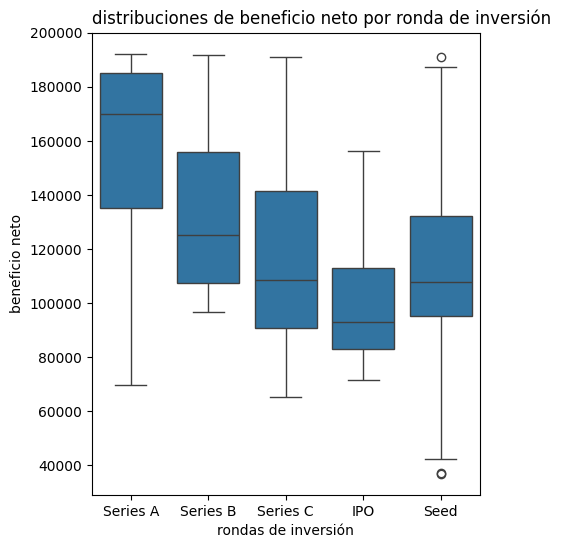

In [37]:
plt.figure(figsize=(5, 6))
sns.boxplot(x='investment_round', y='net_profit', data=startups)
plt.xlabel('rondas de inversión')
plt.ylabel('beneficio neto')
plt.title('distribuciones de beneficio neto por ronda de inversión', loc='left')
plt.grid(False)
plt.show()

### **_Conclusiones halladas observando los beneficios netos en diferentes etapas de ronda de inversión_**

Disclaimer: en el box plot no se ordenó por etapa: el orden sería como se indicó antes los significados (seed, serie a, serie b, serie c y ipo).

- **Las startups con mayor beneficio neto son las que recibieron financiación de _Serie A_**. Se puede asumir que las startups que superaron la etapa semilla y recibieron Serie A, tienen un mayor potencial de éxito.

- **Las startups con menor beneficio neto son las que recibieron financiación de _IPO_**. Son empresas que están comenzando a madurar.

